In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

C:\Users\Rohit\Anaconda3\envs\aind\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2587769406788164741, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9235106366
 locality {
   bus_id: 1
 }
 incarnation: 3594580615747534966
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [2]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


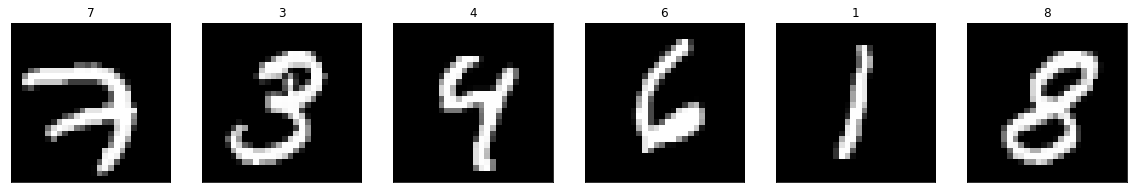

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(train_data[i].reshape(28,-1), cmap='gray')
    ax.set_title(str(train_labels[i]))

In [12]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def onehot(x,classes = None):
    if classes is None:
        classes = len(np.unique(x))
    onehotencoded = np.zeros((x.shape[0],classes))
    onehotencoded[np.arange(x.shape[0]), x] = 1
    return onehotencoded
train_labels_onehot = onehot(train_labels)

In [5]:
input_images = tf.placeholder(tf.float32, [None, 784], name='input_images')
input_labels = tf.placeholder(tf.float32, [None, 10], name = 'input_labels')

In [6]:
def create_mlp_net(input_images=input_images, reuse=False, istraining=True):
    with tf.variable_scope('mlp', reuse = reuse):
        l1 = tf.layers.dense(input_images, 512, activation=tf.nn.relu)
#         ld1 = tf.layers.dropout(l1,rate=.2, training = istraining)
        l2 = tf.layers.dense(l1, 512, activation=tf.nn.relu)
#         ld2 = tf.layers.dropout(l2,rate=.2, training = istraining)
        y = tf.layers.dense(l2, 10, activation=tf.nn.softmax)
    return y

In [7]:
def basicnet():
    W = tf.Variable(tf.zeros([784,10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.nn.softmax(tf.matmul(input_images,W)+b)
    return y

In [8]:
y_train = create_mlp_net(reuse=False,istraining=False)
y_predict = create_mlp_net(reuse=True,istraining=False)

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(input_labels * tf.log(y_train), axis=[1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.3).minimize(cross_entropy)

In [13]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for _ in range(5):
        train_data,train_labels_onehot = unison_shuffled_copies(train_data,train_labels_onehot)
        for i in range(1000):
            batch_xs, batch_ys = train_data[i*55:i*55+55], train_labels_onehot[i*55:i*55+55]
            sess.run(train_step, feed_dict={input_images: batch_xs, input_labels: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y_predict,1), tf.argmax(input_labels,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={input_images: eval_data, input_labels: onehot(eval_labels)}))

0.9797
